In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [4]:
x = [[0], [1], [2], [3]]
y = [0,0,1,1]

In [5]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
new_point = [1.1]

In [11]:
neigh.predict(new_point)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [13]:
neigh.predict_proba(new_point) ## gives the probability that the point falls into one vs the other category)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.66666667,  0.33333333]])

In [18]:
%pwd

u'/Users/christophereppig'

In [16]:
%cd Datasets/breast-cancer-wisconsin.csv

/Users/christophereppig


In [22]:
names = ['id_num',
        'clump_thickness',
        'uniformity_cell_size',
        'uniformity_cell_shape',
        'marginal_adhesion',
        'epithelial_cell_size',
        'bare_nuclei',
        'bland_chromatin',
        'normal_nucleoli',
        'mitoses',
        'class']

In [23]:
cancer = pd.read_csv('Datasets/breast-cancer-wisconsin.csv', names=names)

In [24]:
cancer.head()

,id_num,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [26]:
cancer.shape

(699, 11)

In [28]:
cancer['class'] = cancer['class'].apply(lambda x: 1 if x==4 else 0)
cancer['class'].describe()

count    699.000000
mean       0.344778
std        0.475636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64

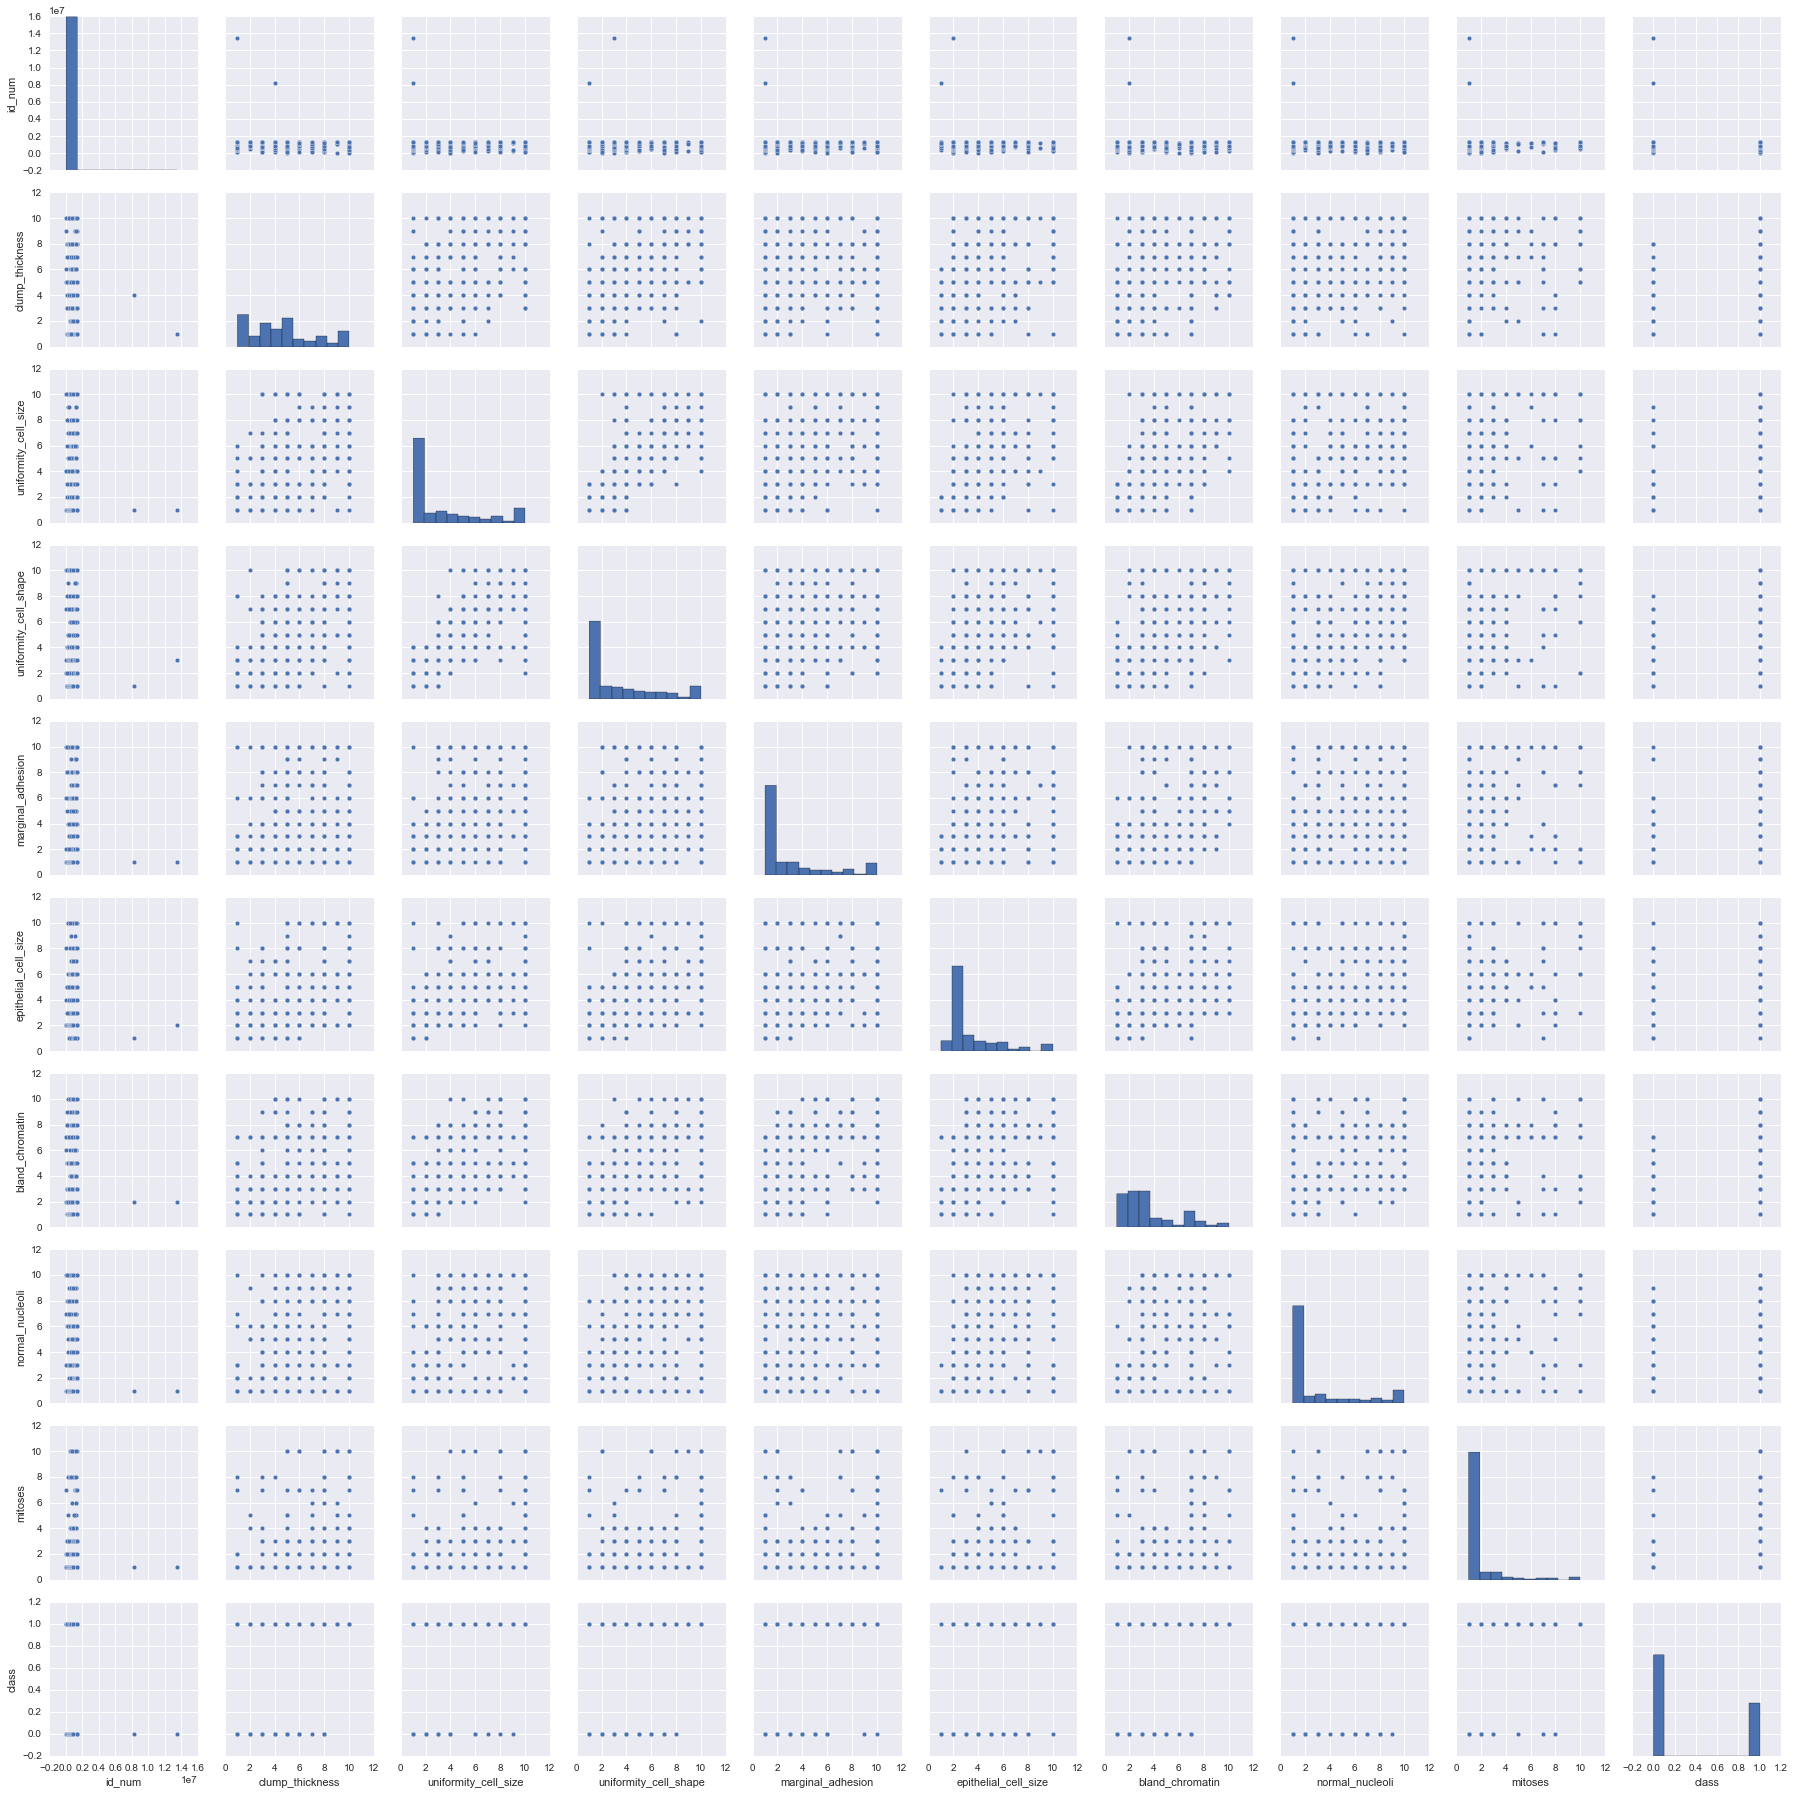

In [29]:
sns.pairplot(cancer)

In [32]:
cancer.corr()

,id_num,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
id_num,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniformity_cell_size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniformity_cell_shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_cell_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [33]:
cancer.corr().loc[:,'class']

id_num                  -0.080226
clump_thickness          0.716001
uniformity_cell_size     0.817904
uniformity_cell_shape    0.818934
marginal_adhesion        0.696800
epithelial_cell_size     0.682785
bland_chromatin          0.756616
normal_nucleoli          0.712244
mitoses                  0.423170
class                    1.000000
Name: class, dtype: float64

In [35]:
cancer[['class', 'uniformity_cell_size', 'uniformity_cell_shape', 'bland_chromatin']].corr()

,class,uniformity_cell_size,uniformity_cell_shape,bland_chromatin
class,1.000000,0.817904,0.818934,0.756616
uniformity_cell_size,0.817904,1.000000,0.906882,0.755721
uniformity_cell_shape,0.818934,0.906882,1.000000,0.735948
bland_chromatin,0.756616,0.755721,0.735948,1.000000


In [39]:
y = cancer['class'].reshape(-1,1)
x = cancer[['uniformity_cell_size', 'uniformity_cell_shape', 'bland_chromatin']]

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

In [45]:
knn.fit(x,y)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
knn.score(x,y)  # gives percent of all observations that were fit correctly (true positives and true negatives)

0.95565092989985689

In [54]:
print knn.predict([[2,8,2]])
print knn.predict_proba([[2,8,2]])

[1]
[[ 0.2  0.8]]


In [48]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [49]:
knn1.fit(x,y)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
knn1.score(x,y)

0.97138769670958514